In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('logistic_regression_dataset.csv')
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


In [217]:
# Afficher la liste des noms de colonnes du DataFrame
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [218]:
# Afficher les types de données de chaque colonne du DataFrame
df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

In [219]:
df.isnull().sum()

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64

In [220]:
#Preprocessing 

#conversion des variables catégorielles en numériques
# 1ère méthode : utiliser LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['is_smoking'] = le.fit_transform(df['is_smoking'])

# 2ème méthode : utiliser map()
df["sex"] = df["sex"].map({"F": 1, "M": 0})

# 3ème méthode : utiliser replace()
#vals = {"F":1 , "M":0}
#df["sex"] = df["sex"].replace(vals)

df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,1,0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,1,0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,0,0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,1,0,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


In [221]:
df['education'] = df['education'].fillna(df['education'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())
df['TenYearCHD'] = df['TenYearCHD'].fillna(df['TenYearCHD'].mode()[0]) # Remplir les valeurs manquantes dans la colonne 'TenYearCHD' avec le mode
df.dropna(subset=['BPMeds', 'cigsPerDay','totChol','BMI','heartRate'],axis=0,inplace=True)
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.00000,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.000000,0.0
2,2,46,1.00000,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.000000,0.0
3,3,50,1.00000,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.000000,1.0
4,4,64,1.00000,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.000000,0.0
5,5,61,3.00000,1,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.00000,1,0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.000000,0.0
4234,4234,58,2.00000,1,0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.000000,0.0
4235,4235,55,1.00000,0,0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,81.966753,0.0
4236,4236,45,3.00000,1,0,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.000000,0.0


In [222]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [223]:
# Vérifier s'il y a des lignes dupliquées
print(df.duplicated().sum())

0


In [224]:
df.describe()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,2116.057485,49.504403,1.981867,0.565313,0.490215,8.992417,0.029354,0.005382,0.309198,0.025440,236.682241,132.224193,82.888209,25.798889,75.836106,81.890100,0.119374
std,1222.904846,8.541411,1.008006,0.495776,0.499965,11.910941,0.168818,0.073171,0.462219,0.157478,44.466740,21.906447,11.839921,4.077910,12.064789,22.875901,0.324267
min,1.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,1054.750000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,2118.500000,49.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,79.000000,0.000000
75%,3175.250000,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,28.040000,83.000000,85.000000,0.000000
max,4237.000000,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [225]:
# standardisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_standardize = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,0,0,-0.755064,0.0,0,1,0,-0.555140,1.633318,1.276498,0.973929,72.0,-0.301232,0.0
2,2,46,1.0,1,1,0.084603,0.0,0,0,0,0.299536,-0.740703,-1.004201,-1.336360,88.0,0.529438,0.0
3,3,50,1.0,0,1,0.924270,0.0,0,1,0,-0.082819,1.176775,0.431795,0.603596,68.0,0.529438,1.0
4,4,64,1.0,1,1,1.763937,0.0,0,0,0,0.097113,0.195209,0.178384,0.152330,70.0,-0.213793,0.0
5,5,61,3.0,1,0,-0.755064,0.0,0,1,0,0.794348,2.272477,3.219316,1.717048,85.0,-0.738426,1.0


In [226]:
df["TenYearCHD"].value_counts()# unbalanced values(déséquilibrée)

# 3600>>>488 pour équiliblrée les données on peut utiliser SMOTE
# SMOTE est utilisé pour créer de nouveaux échantillons synthétiques dans la classe minoritaire afin de rendre le jeu de données plus équilibré.

TenYearCHD
0.0    3600
1.0     488
Name: count, dtype: int64

In [227]:
#!pip install imbalanced-learn

In [228]:
# prompt: import smote

from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [229]:
# 1. Apply logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Extraction des caractéristiques
x = df.drop(['TenYearCHD','id','education'], axis=1)
y = df['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)  # Division des données avec une taille de test de 25%
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

logreg = LogisticRegression(max_iter=1000)   # Construction de notre modèle logistique /# Augmentation du nombre d'itérations si nécessaire
logreg.fit(x_train_smote,y_train_smote)  # Ajustement des données d'entraînement

y_pred = logreg.predict(x_test)  # prédiction
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))




Accuracy=0.71


In [230]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.81       897
         1.0       0.21      0.50      0.29       125

    accuracy                           0.71      1022
   macro avg       0.56      0.62      0.55      1022
weighted avg       0.83      0.71      0.75      1022



In [231]:
# 2. Use a confusion matrix to validate your model.

from sklearn.metrics import confusion_matrix

# Generating predictions for the test set
y_pred = logreg.predict(x_test)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[660 237]
 [ 63  62]]


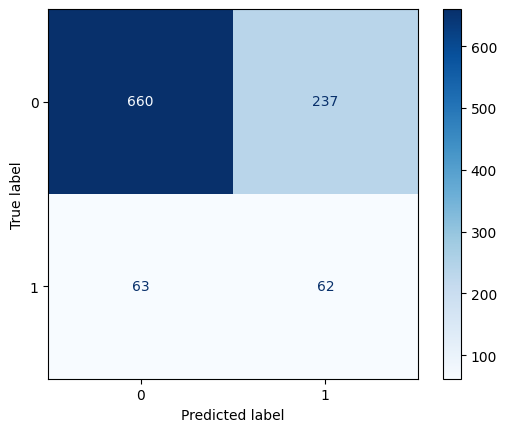

In [232]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot(cmap='Blues')
plt.show()

AUC Score: 0.67


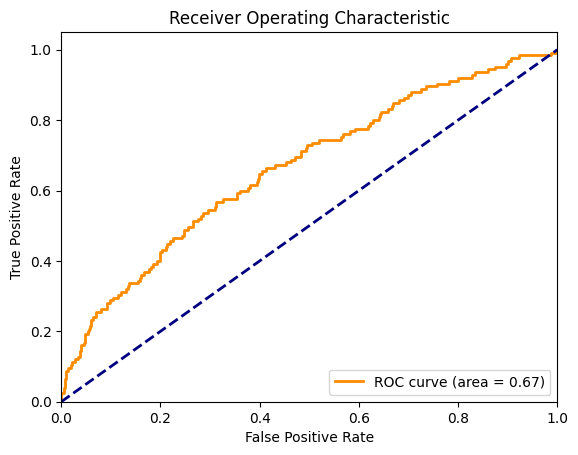

In [233]:
#3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

from sklearn.metrics import roc_curve, auc

# Getting the probability predictions for the positive class
y_pred_proba = logreg.predict_proba(x_test)[:, 1]

# Calculating the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating the AUC score
roc_auc = auc(fpr, tpr)

print("AUC Score: {:.2f}".format(roc_auc))

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
